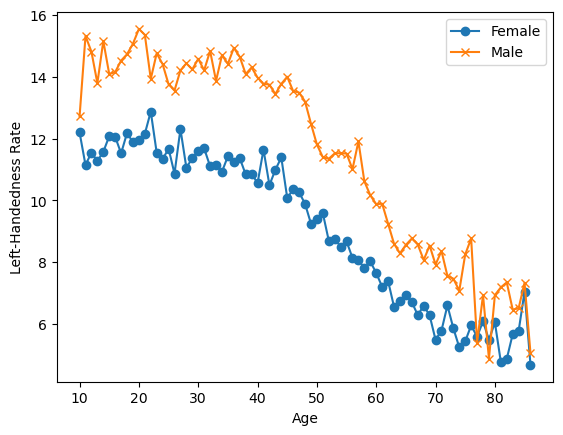

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

%matplotlib inline
fig, ax = plt.subplots() 
ax.plot(lefthanded_data["Age"], lefthanded_data["Female"], label="Female", marker='o')
ax.plot(lefthanded_data["Age"], lefthanded_data["Male"], label="Male", marker='x')
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Left-Handedness Rate")
plt.show()


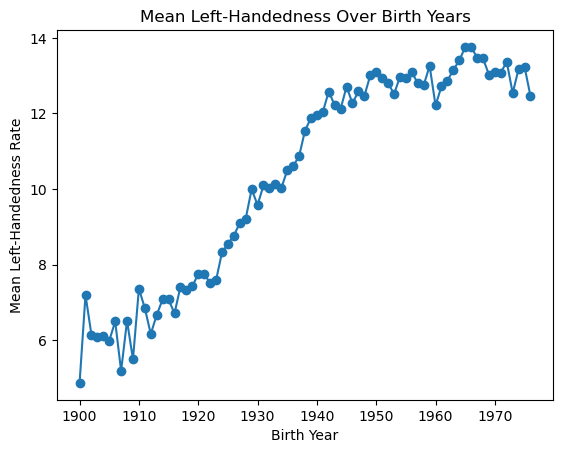

In [2]:
current_year = 1986
lefthanded_data['Birth_year'] = current_year - lefthanded_data['Age']
lefthanded_data['Mean_lh'] = (lefthanded_data['Female'] + lefthanded_data['Male']) / 2
fig, ax = plt.subplots()
ax.plot(lefthanded_data['Birth_year'], lefthanded_data['Mean_lh'], marker='o', linestyle='-')
ax.set_xlabel("Birth Year")
ax.set_ylabel("Mean Left-Handedness Rate")
ax.set_title("Mean Left-Handedness Over Birth Years")
plt.show()


In [3]:
import numpy as np

def P_lh_given_A(ages_of_death, study_year = 1990):
     
    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean() 
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10
    oldest_age = study_year - 1986 + 86
    
    P_return = np.zeros(ages_of_death.shape) 
    
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return P_return

Text(0, 0.5, 'Both Sexes')

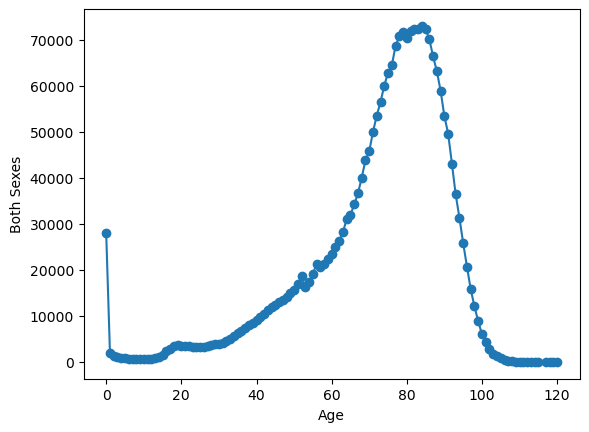

In [4]:
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])
death_distribution_data = death_distribution_data.dropna(subset = ['Both Sexes'])
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age') 
ax.set_ylabel('Both Sexes')

In [5]:
def P_lh(death_distribution_data, study_year = 1990):
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year) # multiply number of dead people by P_lh_given_A
    p = np.sum(p_list)
    return p / np.sum(death_distribution_data['Both Sexes'])

print(P_lh(death_distribution_data))

0.07766387615350638


In [6]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) 
    P_lh_A = P_lh_given_A(ages_of_death, study_year) 
    return P_lh_A*P_A/P_left

In [7]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year)
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year)
    return P_rh_A*P_A/P_right

Text(0, 0.5, 'Probability of being age A at death')

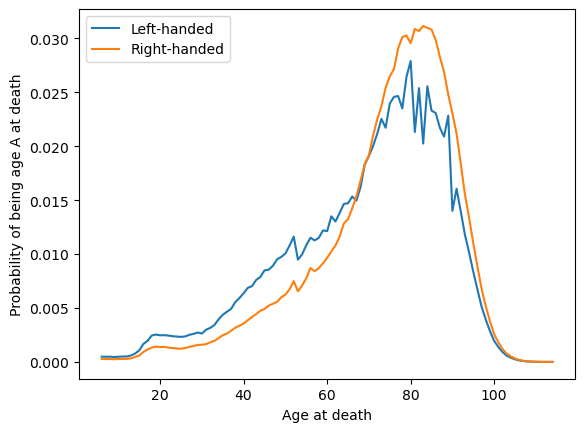

In [8]:
ages = np.arange(6, 115, 1) 


left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)


fig, ax = plt.subplots()
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = 'Right-handed')
ax.legend()
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

In [9]:
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

print("Average age of lefthanded: " + str(average_lh_age))
print("Average age of righthanded: " + str(average_rh_age))

print("The difference in average ages is: " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

Average age of lefthanded: 67.24503662801027
Average age of righthanded: 72.79171936526477
The difference in average ages is: 5.5 years.


In [10]:
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)

average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

print("The difference in average ages is: " + 
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is: 2.3 years.
